In [21]:
import numpy as np 
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/budget-sales-analytics/Budget.xlsx
/kaggle/input/budget-sales-analytics/AdventureWorks_Database.xlsx


In [22]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [23]:
import pandas as pd

budget_path = '/kaggle/input/budget-sales-analytics/Budget.xlsx'
adventureworks_path = '/kaggle/input/budget-sales-analytics/AdventureWorks_Database.xlsx'

budget_sheets = pd.ExcelFile(budget_path).sheet_names
adventureworks_sheets = pd.ExcelFile(adventureworks_path).sheet_names

budget_sheets, adventureworks_sheets

(['Budget'], ['Calender', 'Customers', 'Product', 'Territory', 'Sales'])

In [24]:
budget_data = pd.read_excel(budget_path, sheet_name='Budget')
budget_head = budget_data.head()


calendar_data = pd.read_excel(adventureworks_path, sheet_name='Calender')
customers_data = pd.read_excel(adventureworks_path, sheet_name='Customers')
product_data = pd.read_excel(adventureworks_path, sheet_name='Product')
territory_data = pd.read_excel(adventureworks_path, sheet_name='Territory')
sales_data = pd.read_excel(adventureworks_path, sheet_name='Sales')

calendar_head = calendar_data.head()
customers_head = customers_data.head()
product_head = product_data.head()
territory_head = territory_data.head()
sales_head = sales_data.head()

budget_head, calendar_head, customers_head, product_head, territory_head, sales_head

(    AdventureWorks Budget Data   Unnamed: 1              Unnamed: 2  \
 0    Prepared By: Johnny Bunko          NaN                     NaN   
 1  AdventureWorks Confidential          NaN                     NaN   
 2                     Category  Subcategory             ProductName   
 3                  Accessories   Bike Racks     Hitch Rack - 4-Bike   
 4                  Accessories  Bike Stands  All-Purpose Bike Stand   
 
    Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8  \
 0         NaN        NaN        NaN        NaN        NaN        NaN   
 1         NaN        NaN        NaN        NaN        NaN        NaN   
 2  ProductKey  Jan, 2016  Feb, 2016  Mar, 2016  Apr, 2016  May, 2016   
 3         483       1131       2635       4134       2179       2637   
 4         486        666       3695       2868       4862       3439   
 
   Unnamed: 9 Unnamed: 10 Unnamed: 11 Unnamed: 12 Unnamed: 13 Unnamed: 14  \
 0        NaN         NaN         NaN         NaN

In [25]:
# Budget Data
budget_data = pd.read_excel(budget_path, sheet_name='Budget')
budget_cleaned = budget_data.drop([0, 1]).reset_index(drop=True)
budget_cleaned.columns = budget_cleaned.iloc[0]
budget_cleaned = budget_cleaned.drop(0).reset_index(drop=True)

# Select only the numeric columns for budget calculations, starting from the 3rd column (first two are 'Category' and 'Subcategory')
budget_cleaned.iloc[:, 2:] = budget_cleaned.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')

# Group by Category and sum the budgets
category_budget_summary = budget_cleaned.groupby('Category').sum()

# Sales Data
sales_data = pd.read_excel(adventureworks_path, sheet_name='Sales')
sales_data['TotalSales'] = sales_data['OrderQuantity'] * sales_data['UnitPrice']

# Product Sales Summary
product_sales_summary = sales_data.groupby('ProductKey')['TotalSales'].sum().reset_index()

In [26]:
# Top 5 Customers by Total Sales
customer_sales_summary = sales_data.groupby('CustomerKey')['TotalSales'].sum().reset_index()
top_5_customers = customer_sales_summary.nlargest(5, 'TotalSales')

# Territory Sales Summary
territory_sales_summary = sales_data.groupby('SalesTerritoryKey')['TotalSales'].sum().reset_index()

# Plotting the graphs
sns.set(style="whitegrid")


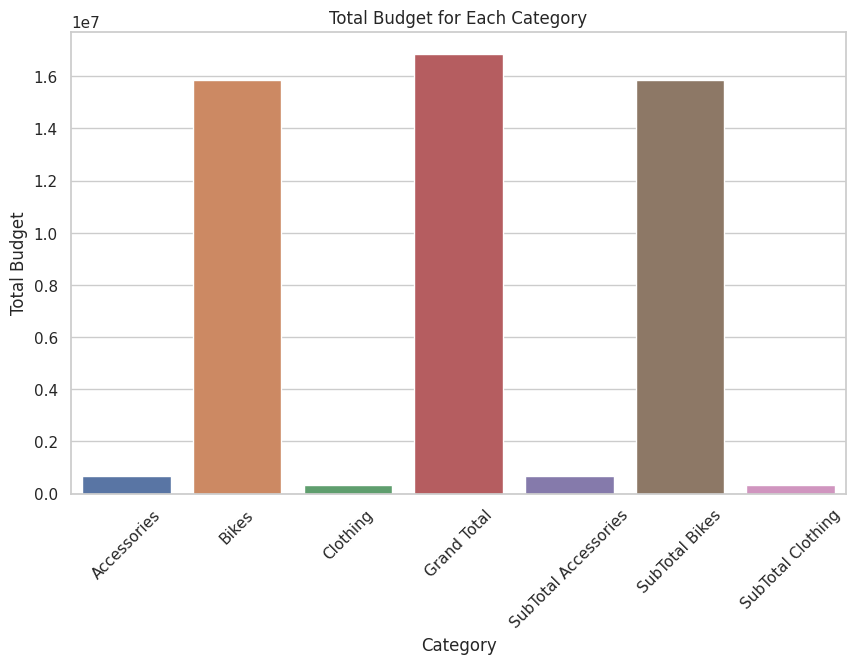

In [27]:
# Total Budget for Each Category
plt.figure(figsize=(10, 6))
sns.barplot(x=category_budget_summary.index, y=category_budget_summary['Grand Total'])
plt.title('Total Budget for Each Category')
plt.xlabel('Category')
plt.ylabel('Total Budget')
plt.xticks(rotation=45)
plt.show()

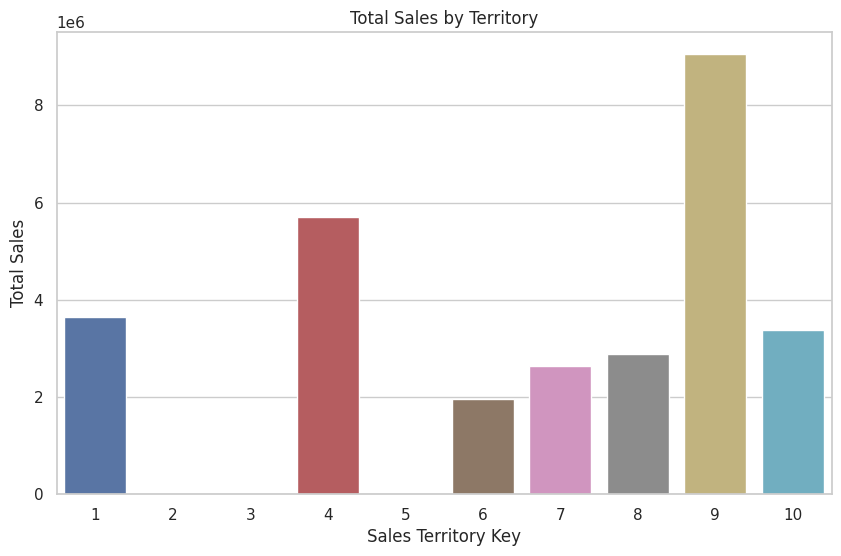

In [28]:
# Total Sales by Territory
plt.figure(figsize=(10, 6))
sns.barplot(x='SalesTerritoryKey', y='TotalSales', data=territory_sales_summary)
plt.title('Total Sales by Territory')
plt.xlabel('Sales Territory Key')
plt.ylabel('Total Sales')
plt.show()